<a href="https://colab.research.google.com/github/ALOK158/Neural_Network_TensorFlow/blob/main/Module_1_Neural_Network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion Model with neural network via tensorflow

In leyman is use to predict numbers


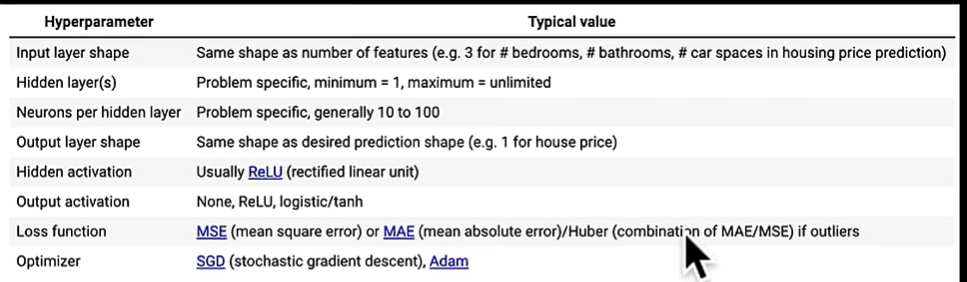

In [ ]:
#Import TEnsroflow
import tensorflow as tf
print(tf.__version__)

2.17.1


###Create data to view and fit

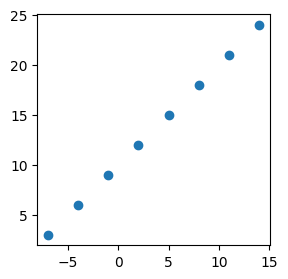

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Create Features
X=np.array([-7,-4,-1,2,5,8,11,14])
Y=np.array([3,6,9,12,15,18,21,24])

#visualize it
plt.figure(figsize=(3, 3))
plt.scatter(X,Y)


###Input and Output Shapes

In [ ]:
#create demo tensor for housing problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
##But do we need that much in out putputshape- 8 diifent enties
#We need just one entities to predict the Y

In [ ]:
input_shape=X[0].shape
output_shape=Y[0].shape
X[0].ndim

0

In [ ]:
# Turn our numpy into tensor
X=tf.constant(X)
Y=tf.constant(Y)
X=tf.cast(X, dtype=tf.float32)
Y=tf.cast(Y, dtype=tf.float32)

In [ ]:
input_shape=X[0].shape
output_shape=Y[0].shape
X[0].ndim
# nodeimension->Scalar value

0

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

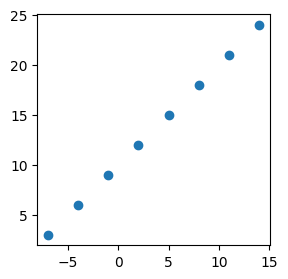

In [ ]:
plt.figure(figsize=(3,3))
plt.scatter(X,Y)
X,Y

##Steps in modelling with Tensorflow

1.Creating the model-define the input and output layers as well as hidden layers of deep learning model

2.Compiling the model-define loss fucntion(in other words it tells the uptop what extent it needs to improve/modify itself) and optimizer(tells our model how to improve the patters it is learning ) and evaluation matrics(tells how well our model is)

3.Fitiing a model-letting the mdoel to try to find pattterns between X and Y(features and labels)

In [ ]:
# SET THE RANDOM SEED
tf.random.set_seed(42)
#Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2 compile the model
model.compile(loss=tf.keras.losses.mae,  ##mae= mean absoilute error
              optimizer=tf.keras.optimizers.SGD(), ##Stochastic Gradient Descent
              metrics=["mae"])
#3 Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - loss: 14.3957 - mae: 14.3957
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.2632 - mae: 14.2632
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.1307 - mae: 14.1307
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.9982 - mae: 13.9982
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.8657 - mae: 13.8657


In [ ]:
#ALternate method to create the model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) ## or .Dense(no. of layers, input_shape(16,0))

In [ ]:
#check out X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#4Try and make the prediction
v=np.array([[17.0]])# we canonot just give interger directly
model.predict(v)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[-5.089212]], dtype=float32)

###### so prdected outcome is very off
###### Now how to improve this


###Improving the model

We can improve our model, by alternating the steps we have used to create the model

1.Creating the mode
    Add more layers,increase the hidden layers,change the activation fucntion

2.Compiling the model    
    We can change the optimizer fucntion and its learning rate too

3.Fitting the model
    Can incraese the no. of epochs and the more data

    
        

In [ ]:
#lets rebuild the model
# create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])
# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#Evalue the model
model.fit(tf.expand_dims(X,axis=1),Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - loss: 10.4610 - mae: 10.4610
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.3285 - mae: 10.3285
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.1959 - mae: 10.1959
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.0635 - mae: 10.0635
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.9310 - mae: 9.9310
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.7985 - mae: 9.7985
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.6659 - mae: 9.6659
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.5335 - mae: 9.5335
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.4010 - mae: 9.4010
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.2684 - mae: 9.2684
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.1360 - mae: 9.1360
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.0035 - mae: 9.0035
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
##predicting the
i=np.array([[17]])
model.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[29.851088]], dtype=float32)

In [ ]:
## Trying to omprove the model further
#1 Crate the mode
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#3Fit the model

model.fit(tf.expand_dims(X,axis=1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step - loss: 13.7164 - mae: 13.7164
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 13.0275 - mae: 13.0275
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.3597 - mae: 12.3597
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.7074 - mae: 11.7074
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.0647 - mae: 11.0647
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.5881 - mae: 10.5881
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.1627 - mae: 10.1627
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.7326 - mae: 9.7326
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.3052 - mae: 9.3052
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.8750 - mae: 8.8750
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 8.4394 - mae: 8.4394
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.0038 - mae: 8.0038
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [ ]:
##predicting the
i=np.array([[17]])
model.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[27.338297]], dtype=float32)

####Common ways to improve the model

1.Adding the layers

2.Trying to change the activation function

3.Loss fucntion, Optimizer,metric, Epoch

4.**Learning rate**- Most important hyperparameter to imporve the model

In [ ]:
## So even the loss got reduce even though prediction is very low
## TH model is getting overfitting on test data

##Evaluating the model
In practise a typical workflow you will go through when a building the model

```
Build the model->fit->evaluate it->tweak the model->fir it->evaluate it


###When it comes to evluatione... there are three main points to consider
"Visualize, Visualize, Visualize"

It is good to visualize:
*The data-

*The model itself-how does our model
look like

*The traianing model-how model performs while it runs

*The predictions of model-How well is model is predicting against the ground truth

In [ ]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make the label for dataset
Y=X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

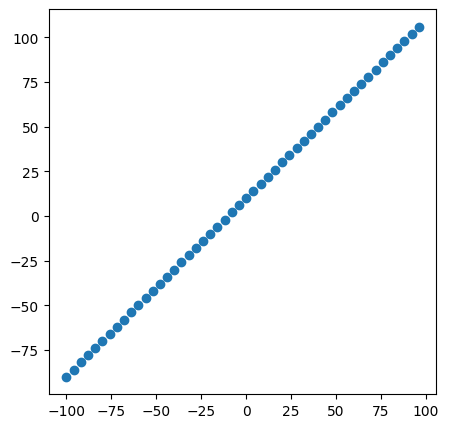

In [ ]:
##Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(X,Y)

### the three datasets
Training set-Model learns from this data

Validation set-MOdel gets tuned on this data-20% of available dataset

Test Set-Model gets evaluated on this dataset,10-15% of the data set




In [ ]:
#Check the length of how many we had
len(X)

50

In [ ]:
#Split the data into train and test set
X_train=X[:40]
Y_train=Y[:40]
X_test=X[40:]
Y_test=Y[40:]
len(X_train),len(Y_train)

(40, 40)

#Visualiseing the data

Now lets visualize our data

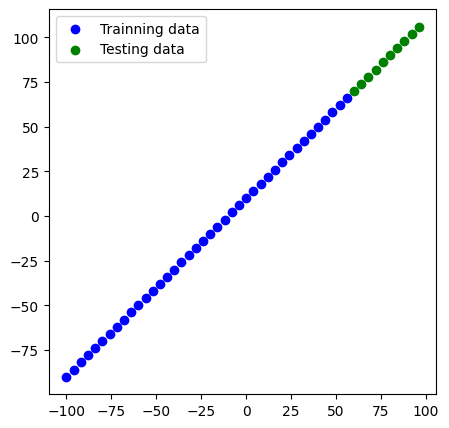

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_train,Y_train, c='b', label="Trainning data")
plt.scatter(X_test,Y_test, c='g', label="Testing data")
#Show legend
plt.legend()

In [ ]:
###Lets buld the model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(520,activation="relu",name="L1"),
    tf.keras.layers.Dense(240,activation="relu",name="L2"),
    tf.keras.layers.Dense(1)
])
# compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
##Fit the model
model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=15)

##Evaluate the mdoel


Epoch 1/15


In [ ]:
model.summary()

#Visusalize the mdoel


In [ ]:
#lets create the model which builds automatically by defining the input_shape argument in first layer
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
])
#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])



In [ ]:
model.summary()

*  Total params-total no. of paramters in the system
*   Trainable para-these are parameters is that model that be update while traning->Non trainable para??
*    Non-Trainable Para-these parameters
are not get updated(typically when you bring other parameters from other model while **transfer learning**)

Can check out MIT's-Deep learning

In [ ]:
###Lets buld the model
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(520,activation="relu", name="L1"),#Can name every layer
    tf.keras.layers.Dense(240,activation="relu", name="L2"),
    tf.keras.layers.Dense(1)
])
# compile the mkode
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
##Fit the model
model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100, verbose=1)

##Evaluate the mdoel


In [ ]:
#Get the summary of the model
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plt.figure(figsize=(1,1))
plot_model(model, show_shapes=True)

##VIsualizing the model Predictions

To  visualize the predictions, it would be good idea to plot it againt the ground truth labels

IN form of Y_true vs Y_pred(True vs Predcition model)

In [ ]:
#
Y_P=model.predict(X_test)
len(Y_P), len(Y_test)

In [ ]:
plt.scatter(Y_test,Y_P)

In [ ]:
# Lets have a plotting fucntion
def plot_pred(train_data,train_labels,test_data,test_labels,predcition):
  """
  plot traing data , test data and compare prediciton to actual value
  """
  plt.figure(figsize=(5,5))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #plot testing data in green
  plt.scatter(test_data,test_labels,c='g',label="Testing data")
  #plot model prediction in red
  plt.scatter(test_data,predcition,c="r",label="Prediciton")
  #show legend
  plt.legend()





In [ ]:
plot_pred(X_train,Y_train,X_test,Y_test,Y_P)

###Evaluatiing our model using Evalutaion Metrics

Depending on problem you working on there are different types of evalutaing metrics that need to implement

Since we are working on regression model there are two metrics

*MAE-Mean Absolute Error

*MSE -Mean Squared Error


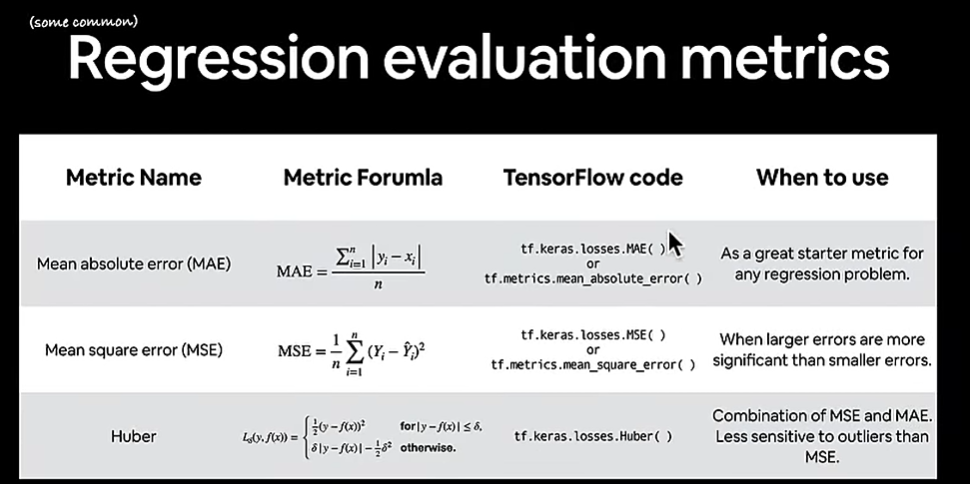

In [ ]:
#Evaluate the model on
model.evaluate(X_test,Y_test)


In [ ]:
Y_test, Y_P
#Both are in different
Y_P2=tf.constant(Y_P)
Y_P2,Y_test#-> both are in differn shape, trying to squezze the Y_P2
Y_P2=tf.squeeze(Y_P2)
Y_P2

In [ ]:
#Calculae the  MAE of Y_P and Y_test
tf.keras.losses.MAE(Y_test,Y_P)

In [ ]:
### We didnot get the MAE of over all, instead we got an array
## So we have checked the Y_test, and Y_P->different shape
#Now we squeezed the Y_P->Y_P2  and make them in same format
#Calculae the  MAE of Y_P2 and Y_test
tf.keras.losses.MAE(Y_test,Y_P2)

In [ ]:
tf.keras.losses.MSE(Y_test,Y_P2)


In [ ]:
# make some fucntion to resuse MAE and MSE
def mae(Y_t,y_p):
  y_p=tf.constant(y_p)
  y_p=tf.squeeze(y_p)
  return tf.keras.losses.MAE(Y_t,y_p)
def mse(y_t,y_p):
  y_p=tf.constant(y_p)
  y_p=tf.squeeze(y_p)
  return tf.keras.losses.MSE(y_t,y_p)



###Runing Experiments to improve the model

```
build model->fit it->evaluate it->improve model->fit it->evaluate it

```

Improve the model

1.Get more data-Better traianing

2.Biggere Architecure of Model

3.Train for longer

lets do 3 modelling experiment

1.model_1=1 layer-100 epochs

2.model_2=2 layers-200 epochs

3.model_3=2 layers-500 epochs

In [ ]:
X_train,Y_train

In [ ]:
#MODEl!
tf.random.set_seed(42)
#bulid the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#compile the model
model_1.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
#fit the model
model_1.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100)

In [ ]:
#Make and plot prediction for model 1
y_p_1=model_1.predict(tf.expand_dims(X_test,axis=1))
plot_pred(X_train,Y_train,X_test,Y_test,y_p_1)

In [ ]:
#Calcualte the Evaluation metrics
mae_1=mae(Y_test,y_p_1)
mse_1=mse(Y_test,y_p_1)
mae_1,mse_1

In [ ]:
#MODEl_2
tf.random.set_seed(42)
#bulid the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(240,activation="relu"),
    tf.keras.layers.Dense(1)
])
#compile the model
model_2.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
#fit the model
model_2.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100)

In [ ]:
## cal. the evalutaion  metrics and plot it
y_p_2=model_2.predict(tf.expand_dims(X_test,axis=1))
plot_pred(X_train,Y_train,X_test,Y_test,y_p_2)

In [ ]:
# Calcualte model_2 Evaluation metrics
mae_2=mae(Y_test,y_p_2)
mse_2=mse(Y_test,y_p_2)
mae_2,mse_2

In [111]:
#MODEl!
tf.random.set_seed(42)
#bulid the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(240,activation="relu"),
    tf.keras.layers.Dense(1)
])
#compile the model
model_3.compile(loss=tf.keras.losses.MSE,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mae"])
#fit the model
model_3.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2325.8823 - mae: 41.2748
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1028.8539 - mae: 27.6413
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 441.5566 - mae: 18.3024
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 128.1216 - mae: 9.8453 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 52.1244 - mae: 6.8228
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 117.0277 - mae: 9.7898
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 171.0188 - mae: 12.1300
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 157.7895 - mae: 11.7036
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 109.7232 - mae: 9.1890
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 72.5918 - mae: 6.3181
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 61.0359 - mae: 6.4261
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 60.4785 - mae: 6.5931
Epoch 13/500
2/2 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


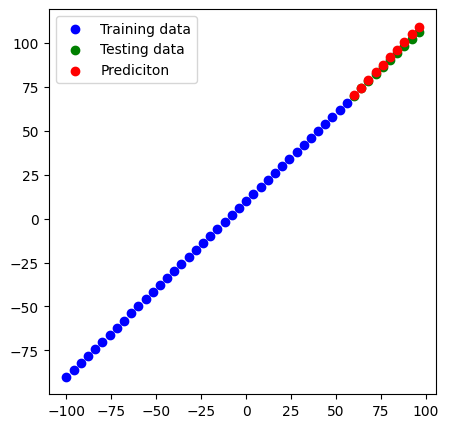

In [112]:
## cal. the evalutaion  metrics and plot it
y_p_3=model_3.predict(tf.expand_dims(X_test,axis=1))
plot_pred(X_train,Y_train,X_test,Y_test,y_p_3)

In [113]:
#Calcualte the Evaluation metrics
mae_3=mae(Y_test,y_p_3)
mse_3=mse(Y_test,y_p_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6190513>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.504619>)

In [114]:
#Calcualte the Evaluation metrics
mae_3=mae(Y_test,y_p_3)
mse_3=mse(Y_test,y_p_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6190513>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.504619>)

***NOTE***- Start with small model and make sure they work and  graduaally  increase the model complexity

###Comparing th results of our experiments

Lets compare the three models

In [115]:
#lets comapre our model's result using pandas DataFRame
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy() ,mse_3.numpy()]]

model_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
model_results

,model,mae,mse
0,model_1,13.320421,178.063019
1,model_2,4.198587,19.370922
2,model_3,1.619051,3.504619


**Note**-More the expermiments , more things you will figure out what does and what doesnot worked
Machine Leaning Expert motto-"Experiment, Experiment,Experiment"

 ### Tracking your Expremients

 One  really good habit in ML modelling it to track ur experiments

 And when doing so, it can be tedious if you are running lots of experiments

 Luckily, there are tools to help ur!

 **Resources** As you build more tools, you wanna to look into using:

 * Tensorboard- a component of Tensorflow library to help track modelling the experiments
 * Weights and Biases- a tool to tracking all kinds of ML experiments(can easily plug in with TensorFLow)

##Saving our models
Saving our models allow us to it outside the googleCollab such as web application or mobile app


There are two main formats to save our model:
* The new .keras format
* THe Save Model Format
* The HDF5 format

In [116]:
# Save model using  modek format
!mkdir -p saved_model
tf.saved_model.save(model_2, 'saved_model/model_2_saved_as_model')

In [117]:
#Saving the model in HDF5 format->Universal Format
model_2.save("my_model_h.h5")

In [118]:
##Loading the saved model
loaded_hdf5model=tf.keras.models.load_model("/content/my_model_h.h5")
loaded_hdf5model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 240)                 │         246,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,291 (969.89 KB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [119]:
model_2.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 240)                 │         246,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 744,869 (2.84 MB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 496,580 (1.89 MB)

In [120]:
# Via keras mehtod
model_2.save('my_model_k.keras')

In [121]:
## Load the save model
m_k=tf.keras.models.load_model('my_model_k.keras')
m_k.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 1024)                │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 240)                 │         246,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │             241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 496,580 (1.89 MB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 248,291 (969.89 KB)

In [ ]:
#compare the model
m_k.evaluate(X_test,Y_test), model_2.evaluate(X_test,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 26.3691 - mae: 4.9323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 26.3691 - mae: 4.9323


([26.369144439697266, 4.932346343994141],
 [26.369144439697266, 4.932346343994141])

##Download the model or any other file from G.collab

If you want to download any file from collab:

1.Can do Directly from files tab and download directly from it.

2.Can use the code (cell below)

3.Can save it in google drive
and copying it there(2nd code cell below)




In [122]:
#Download  from google collab

from google.colab import files
files.download("/content/my_model_k.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
# save a file from google collab to drive (requres mounting google drive)
!cp /content/my_model_k.keras /content/drive/MyDrive/TensorFlow

In [124]:
!ls /content/drive/MyDrive/TensorFlow

my_model_k.keras
